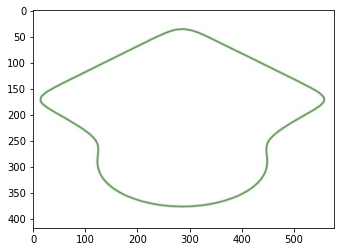

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json

img = cv2.imread('img.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 70, 250)

#plot image
plt.imshow(img, cmap='gray')



In [4]:
contours, hierarchy = cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) 
contour = contours[0]
n = contour.shape[0]
contour = np.reshape(contour, (n,2) )

# move to center
max_ = np.amax(contour,0)
min_ = np.amin(contour,0)
mid = (max_+min_)/2
contour = contour - mid

In [5]:
# change to complex space
contour_cmplx = [c[0]+c[1]*1j for c in contour]

In [7]:
pi = np.pi
order = 30 # order of fineness
coef_list=[]

# DFT
for k in range(-order, order+1):
    coef = np.mean([ c * np.exp(-1j*2*pi/n*k*t) for t,c in enumerate(contour_cmplx)])
    coef_list.append({'freq':k, 'amp':np.abs(coef), 'phase':np.angle(coef)})

In [13]:
# get +- 10
get = 10
to_draw = coef_list[order-get : order+get+1]

In [15]:
with open('ceof.js', 'w') as f:
    to_draw_json = json.dumps(to_draw)
    f.write("const fourier = " + to_draw_json)

5